In [1]:
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow

In [2]:
dataset = 'D:/MSc/SEMESTER 3/DL/Data'

In [3]:
directories = {
    'D:/MSc/SEMESTER 3/DL/Data/Buffalo' : 0,
    'D:/MSc/SEMESTER 3/DL/Data/Elephant': 1,
    'D:/MSc/SEMESTER 3/DL/Data/Rhino': 2,
    'D:/MSc/SEMESTER 3/DL/Data/Zebra': 3
}


In [4]:
def preprocess_images(directory, size=(100, 100)):
    images = []
    labels = []
    for subdir, label in directories.items():
        files = os.listdir(subdir)
        for file in files:
            img_path = os.path.join(subdir, file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, size)  # Resize to a uniform size
            img = img.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

# Preprocess images and labels
images, labels = preprocess_images(directories)


In [5]:

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)


In [6]:
# Print the shapes of the datasets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)
print("Test labels shape:", y_test.shape)

Training set shape: (2800, 100, 100, 3)
Validation set shape: (840, 100, 100, 3)
Test set shape: (360, 100, 100, 3)
Training labels shape: (2800,)
Validation labels shape: (840,)
Test labels shape: (360,)


# ***CNN Architecture***

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout


In [16]:
model = Sequential()

# Convolutional layer 1 with Batch Normalization
model.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2 with Batch Normalization
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3 with Batch Normalization
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Fully connected layer 1
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5)) 

# Output layer
model.add(Dense(4, activation='softmax'))

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,535,940 (36.38 MB)

 Trainable params: 9,534,468 (36.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [29]:
from keras.utils import to_categorical

# Assuming you have four classes, you can specify the number of classes
num_classes = 4

# One-hot encode the labels for training set
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)




In [46]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train_one_hot, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10


70/70 ━━━━━━━━━━━━━━━━━━━━ 68s 903ms/step - accuracy: 0.9633 - loss: 0.1040 - val_accuracy: 0.7393 - val_loss: 1.1016
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 57s 821ms/step - accuracy: 0.9588 - loss: 0.1058 - val_accuracy: 0.7232 - val_loss: 1.2229
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 67s 960ms/step - accuracy: 0.9841 - loss: 0.0620 - val_accuracy: 0.7464 - val_loss: 1.1121
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 56s 804ms/step - accuracy: 0.9751 - loss: 0.0735 - val_accuracy: 0.7179 - val_loss: 1.3167
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 49s 702ms/step - accuracy: 0.9811 - loss: 0.0490 - val_accuracy: 0.7964 - val_loss: 0.7828
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 48s 691ms/step - accuracy: 0.9920 - loss: 0.0306 - val_accuracy: 0.7857 - val_loss: 0.9729
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 54s 775ms/step - accuracy: 0.9920 - loss: 0.0249 - val_accuracy: 0.7679 - val_loss: 0.8982
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 57s 804ms/step - accuracy: 0.9868 - loss: 0.0404 - val_accuracy: 0.755

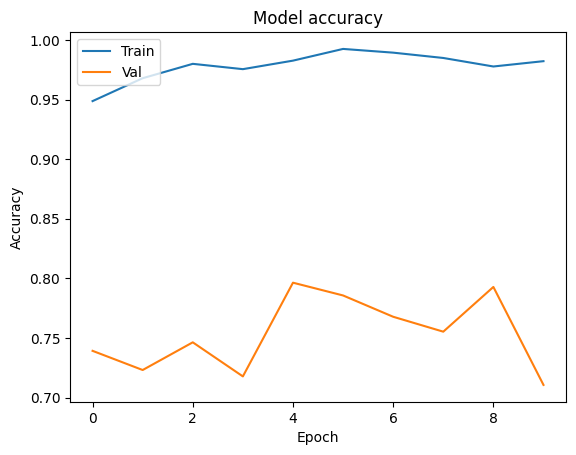

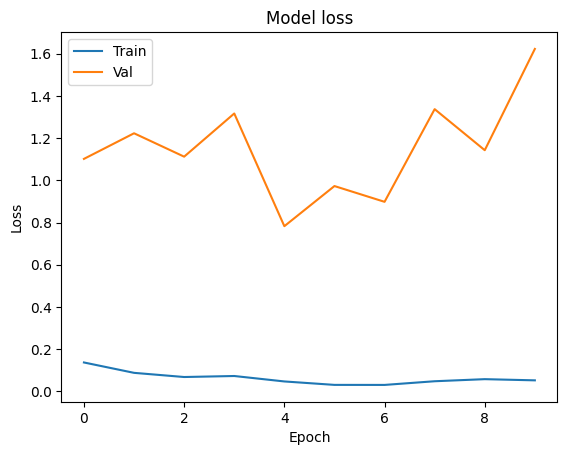

In [50]:
import matplotlib.pyplot as plt

# training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


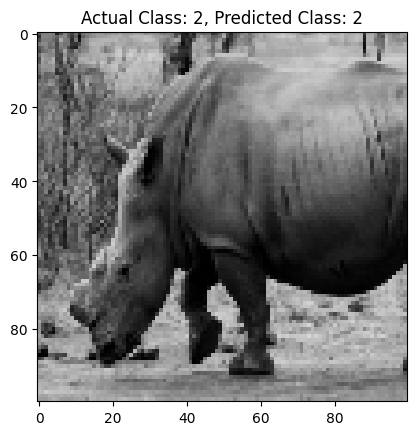

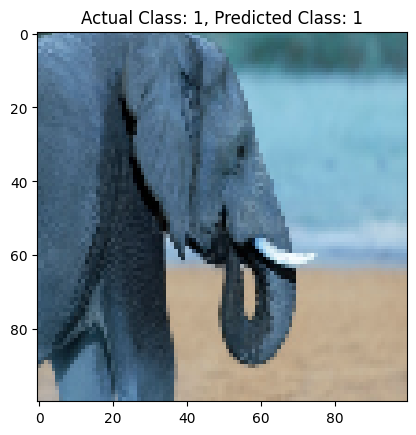

In [51]:
random_indices = np.random.choice(len(X_train), 2, replace=False)

# Selecting corresponding images and labels
random_images = X_train[random_indices]
random_labels = y_train[random_indices]

# Predicting classes
predictions = model.predict(random_images)

# Displaying images with predicted and actual labels
for i in range(2):
    plt.imshow(random_images[i])
    plt.title(f"Actual Class: {random_labels[i]}, Predicted Class: {np.argmax(predictions[i])}")
    plt.show()

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step


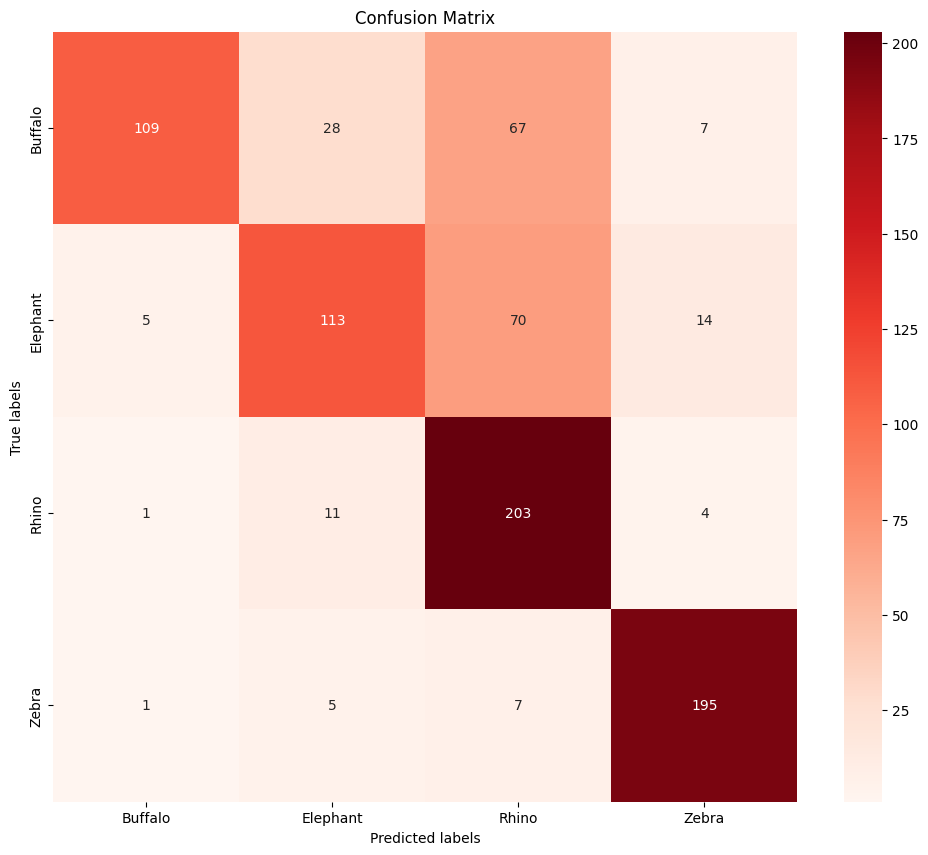

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define class labels
class_labels = ['Buffalo', 'Elephant', 'Rhino', 'Zebra']

# Assuming X_val is your validation dataset
# Assuming y_val is your validation labels (not one-hot encoded)

# Predicting classes for validation dataset
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert numerical indices to class labels
y_pred_labels = [class_labels[i] for i in y_pred_classes]
y_true_labels = [class_labels[i] for i in y_val]

# Creating confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Plotting confusion matrix
plt.figure(figsize=(12,10 ))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=class_labels, 
            yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
